RMAX = 32, Resolution = 512, t = 32

RMAX = 64, Resolution = 1024, t = 32

RMAX = 128, Resolution = 2048, t = 32

RMAX = 256, Resolution = 4096, t = 32

$\Delta t = 0.5 * \Delta x = 0.5 * 32 / 512 = 1 / 32$, so $ number of iteration = t / \Delta t = 1024$
If we want 30 outputs, then output every 34 iterations.

## Blackhole

In [11]:
import numpy as np
from scipy.interpolate import griddata
from pylab import savefig
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import Image
from IPython.display import HTML
import matplotlib.image as mgimg
import glob
import sys
from matplotlib import animation

plt.rcParams.update(plt.rcParamsDefault) 
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.rcParams.update({'font.size': 16}) 
plt.rcParams.update({'font.family' : 'sans-serif'}) 
plt.rcParams.update({'font.sans-serif' : 'Helvetica'}) 
plt.rcParams.update({'figure.figsize' : '10., 6.'}) 
plt.rcParams.update({'figure.autolayout': True})

globby = glob.glob('BSSN_SF-output2D/quad_pot_2d_t-*_BH_256R.txt')
file_list = []
for x in sorted(globby):
    file_list.append(x)

j = 0
maxtime = 32
numf = len(file_list)
for filename in file_list:
    j = j + 1
    time = j*maxtime/numf
    fig = plt.figure()
    x,y,sf,cf,ham = np.loadtxt(filename).T #Transposed for easier unpacking
    
    realx = []
    realcf = []

    for i in range(len(x)):
        if x[i] not in realx:
            realx.append(x[i])
            realcf.append(cf[i])
    
    plotdescription = "Scalar field"
    plt.title("RMAX = 256, Resolution = 4096 \n time = %.2f"%time)
    plt.xlabel("y/M")
    plt.xscale('log')
    plt.ylabel("Conformal Factor")
    #plt.ylabel("Hamiltonian constraint")

    plt.plot(realx,realcf, color=cm.BuGn(8/10.,1))
    plt.axhline(y=1.0, color='red', linestyle='dashed',linewidth=0.3)
    #plt.axhline(y=0.0, color='red', linestyle='dashed',linewidth=0.3)
    plt.ylim(-0.1,1.15)
    #plt.ylim(-1.5,1.5)
    plt.xlim(-0.1,100)
    plt.savefig(filename + ".png") 
    plt.close() 
    
    sys.stdout.write("%c[2K" % 27)
    sys.stdout.write("Processing file %.2f "%time+filename+"\r")
    sys.stdout.flush()

C:\Users\liyan\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


In [12]:
fig = plt.figure(frameon=False)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')

myimages = []

for i in range(len(file_list)-1):
    img = mgimg.imread(file_list[i]+".png")
    imgplot = plt.imshow(img)
    myimages.append([imgplot])

ani = animation.ArtistAnimation(fig, myimages, interval=100,  repeat_delay=1000)
plt.close()
ani.save('BSSN_SF_quad_pot_cf_BH_256R.mp4',dpi=150, fps=5,writer='ffmpeg')

C:\Users\liyan\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


In [4]:
from IPython.display import HTML
#the filename needed to be changed manually

HTML("""
    <video width="480" height="360" controls>
        <source src="BSSN_SF_quad_pot_cf_BH_32R.mp4" type="video/mp4"> 
    </video>
""")

In [7]:
from IPython.display import HTML
#the filename needed to be changed manually

HTML("""
    <video width="480" height="360" controls>
        <source src="BSSN_SF_quad_pot_cf_BH_64R.mp4" type="video/mp4"> 
    </video>
""")

In [10]:
from IPython.display import HTML
#the filename needed to be changed manually

HTML("""
    <video width="480" height="360" controls>
        <source src="BSSN_SF_quad_pot_cf_BH_128R.mp4" type="video/mp4"> 
    </video>
""")

In [13]:
from IPython.display import HTML
#the filename needed to be changed manually

HTML("""
    <video width="480" height="360" controls>
        <source src="BSSN_SF_quad_pot_cf_BH_256R.mp4" type="video/mp4"> 
    </video>
""")

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.linalg as la
# Globally fix plot styling
import matplotlib as mpl
import scipy.optimize as opt

plt.rcParams.update(plt.rcParamsDefault) 
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.rcParams.update({'font.size': 16}) 
plt.rcParams.update({'font.family' : 'sans-serif'}) 
plt.rcParams.update({'font.sans-serif' : 'Helvetica'}) 
plt.rcParams.update({'figure.figsize' : '10., 6.'}) 
plt.rcParams.update({'figure.autolayout': True})

x,y,sf,cf,ham = np.loadtxt('BSSN_SF-output2D/quad_pot_2d_t-00000000_BH_256R_2048.txt').T
realx_2048 = []
realham_2048 = []

for i in range(len(x)):
    if x[i] not in realx_2048:
        realx_2048.append(x[i])
        realham_2048.append(ham[i])

x,y,sf,cf,ham = np.loadtxt('BSSN_SF-output2D/quad_pot_2d_t-00000000_BH_256R.txt').T
realx_4096 = []
realham_4096 = []

for i in range(len(x)):
    if x[i] not in realx_4096:
        realx_4096.append(x[i])
        realham_4096.append(ham[i])

x,y,sf,cf,ham = np.loadtxt('BSSN_SF-output2D/quad_pot_2d_t-00000000_BH_256R_8192.txt').T
realx_8192 = []
realham_8192 = []

for i in range(len(x)):
    if x[i] not in realx_8192:
        realx_8192.append(x[i])
        realham_8192.append(ham[i])
        
x,y,sf,cf,ham = np.loadtxt('BSSN_SF-output2D/quad_pot_2d_t-00000000_BH_256R_16384.txt').T
realx_16384 = []
realham_16384 = []

for i in range(len(x)):
    if x[i] not in realx_16384:
        realx_16384.append(x[i])
        realham_16384.append(ham[i])
    
fig = plt.figure()
plotdescription = "Scalar field"
plt.title("BlackHole Hamiltonian constraint at t=0 for \n RMAX = 256, Resolution=2048, 4096, 8192, 16384")
plt.xlabel("y/M")
plt.xscale('log')
plt.ylabel("Hamiltonian constraint")
plt.yscale('log')

plt.plot(realx_2048,np.abs(realham_2048),label='RES=2048')
plt.plot(realx_4096,np.abs(realham_4096),label='RES=4096')
plt.plot(realx_8192,np.abs(realham_8192),label='RES=8192')
plt.plot(realx_16384,np.abs(realham_16384),label='RES=16384')
#plt.axhline(y=0.0, color='purple', linestyle='dashed',label='Theory')
plt.legend()

plt.ylim(0.0,1.0)
plt.xlim(0.0,100.0)
plt.savefig("Ham for diff RES (quad, Blackhole).png") 
plt.close() 

C:\Users\liyan\Anaconda3\lib\site-packages\ipykernel_launcher.py:69: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
C:\Users\liyan\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


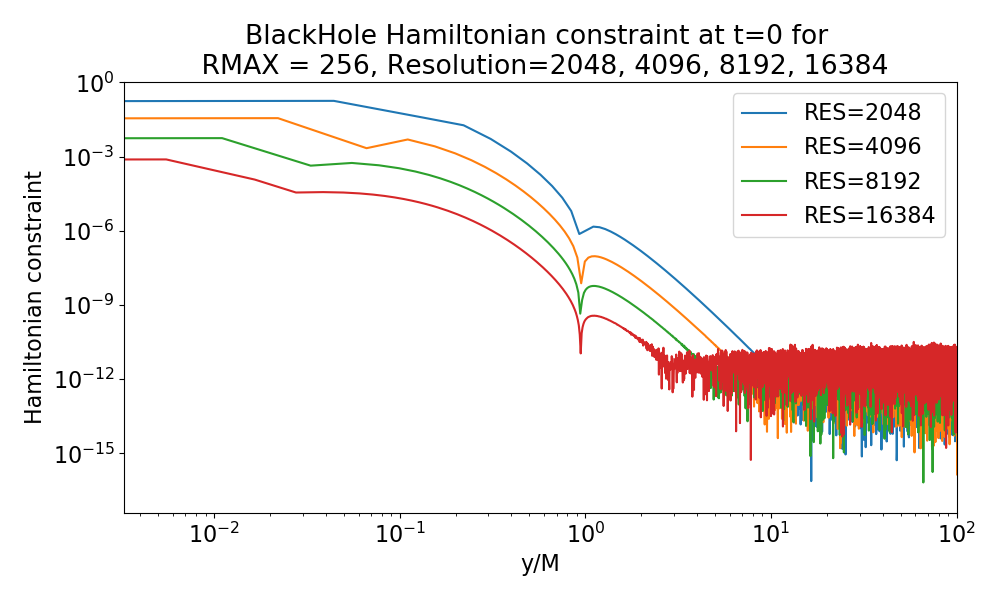

In [25]:
Image("Ham for diff RES (quad, Blackhole).png")

In [45]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.linalg as la
# Globally fix plot styling
import matplotlib as mpl
import scipy.optimize as opt

plt.rcParams.update(plt.rcParamsDefault) 
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.rcParams.update({'font.size': 16}) 
plt.rcParams.update({'font.family' : 'sans-serif'}) 
plt.rcParams.update({'font.sans-serif' : 'Helvetica'}) 
plt.rcParams.update({'figure.figsize' : '10., 6.'}) 
plt.rcParams.update({'figure.autolayout': True})

x,y,sf,cf,ham = np.loadtxt('BSSN_SF-output2D/quad_pot_2d_t-00000000_BH_256R_2048.txt').T
realx_2048 = []
realcf_2048 = []

for i in range(len(x)):
    if x[i] not in realx_2048:
        realx_2048.append(x[i])
        realcf_2048.append(cf[i])

x,y,sf,cf,ham = np.loadtxt('BSSN_SF-output2D/quad_pot_2d_t-00000000_BH_256R.txt').T
realx_4096 = []
realcf_4096 = []

for i in range(len(x)):
    if x[i] not in realx_4096:
        realx_4096.append(x[i])
        realcf_4096.append(cf[i])

x,y,sf,cf,ham = np.loadtxt('BSSN_SF-output2D/quad_pot_2d_t-00000000_BH_256R_8192.txt').T
realx_8192 = []
realcf_8192 = []

for i in range(len(x)):
    if x[i] not in realx_8192:
        realx_8192.append(x[i])
        realcf_8192.append(cf[i])
        
x,y,sf,cf,ham = np.loadtxt('BSSN_SF-output2D/quad_pot_2d_t-00000000_BH_256R_16384.txt').T
realx_16384 = []
realcf_16384 = []

for i in range(len(x)):
    if x[i] not in realx_16384:
        realx_16384.append(x[i])
        realcf_16384.append(cf[i])
    
fig = plt.figure()
plotdescription = "Scalar field"
plt.title("Blackhole Conformal Factor at t=0 for \n RMAX = 256, Resolution=2048, 4096, 8192, 16384")
plt.xlabel("y/M")
plt.xscale('log')
plt.ylabel("Conformal Factor")
#plt.yscale('log')

plt.plot(realx_2048,realcf_2048,label='RES=2048',linewidth=0.2)
plt.plot(realx_4096,realcf_4096,label='RES=4096',linewidth=0.2)
plt.plot(realx_8192,realcf_8192,label='RES=8192',linewidth=0.2)
plt.plot(realx_16384,realcf_16384,label='RES=16384',linewidth=0.2)
#plt.axhline(y=0.0, color='purple', linestyle='dashed',label='Theory')
plt.legend()

plt.ylim(-0.05,1.05)
plt.xlim(0.0,147.0)
plt.savefig("CF for diff RES (quad, Blackhole).png") 
plt.close() 

C:\Users\liyan\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


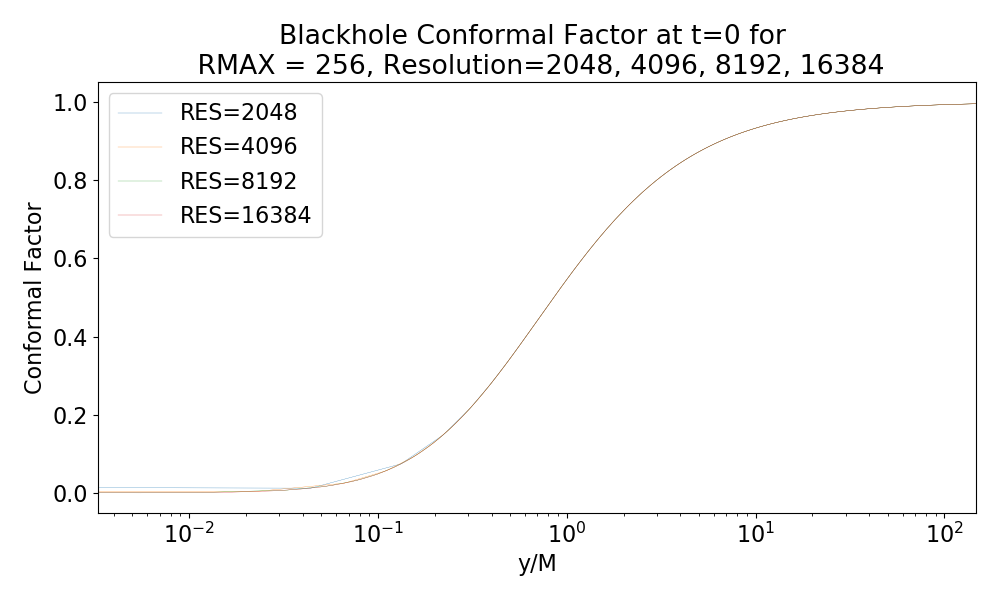

In [46]:
Image("CF for diff RES (quad, Blackhole).png")

## Boson Star

In [81]:
import numpy as np
from scipy.interpolate import griddata
from pylab import savefig
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import Image
from IPython.display import HTML
import matplotlib.image as mgimg
import glob
import sys
from matplotlib import animation

plt.rcParams.update(plt.rcParamsDefault) 
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.rcParams.update({'font.size': 16}) 
plt.rcParams.update({'font.family' : 'sans-serif'}) 
plt.rcParams.update({'font.sans-serif' : 'Helvetica'}) 
plt.rcParams.update({'figure.figsize' : '10., 6.'}) 
plt.rcParams.update({'figure.autolayout': True})

globby = glob.glob('BSSN_SF-output2D/quad_pot_2d_t-*_Boson_256R.txt')
file_list = []
for x in sorted(globby):
    file_list.append(x)

j = 0
maxtime = 32
numf = len(file_list)
for filename in file_list:
    j = j + 1
    time = j*maxtime/numf
    fig = plt.figure()
    x,y,sf,cf,ham = np.loadtxt(filename).T #Transposed for easier unpacking
    
    realx = []
    realham = []

    for i in range(len(x)):
        if x[i] not in realx:
            realx.append(x[i])
            realham.append(ham[i])
    
    plotdescription = "Scalar field"
    plt.title("RMAX = 256, Resolution = 4096 \n time = %.2f"%time)
    plt.xlabel("y/M")
    plt.xscale('log')
    #plt.ylabel("Conformal Factor")
    plt.ylabel("Hamiltonian constraint")

    plt.plot(realx,realham, color=cm.BuGn(8/10.,1))
    #plt.axhline(y=1.0, color='red', linestyle='dashed',linewidth=0.3)
    plt.axhline(y=0.0, color='red', linestyle='dashed',linewidth=0.3)
    #plt.ylim(-0.1,1.15)
    plt.ylim(-0.005,0.0175)
    plt.xlim(-0.1,100)
    plt.savefig(filename + ".png") 
    plt.close() 
    
    sys.stdout.write("%c[2K" % 27)
    sys.stdout.write("Processing file %.2f "%time+filename+"\r")
    sys.stdout.flush()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


In [82]:
fig = plt.figure(frameon=False)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')

myimages = []

for i in range(len(file_list)-1):
    img = mgimg.imread(file_list[i]+".png")
    imgplot = plt.imshow(img)
    myimages.append([imgplot])

ani = animation.ArtistAnimation(fig, myimages, interval=100,  repeat_delay=1000)
plt.close()
ani.save('BSSN_SF_quad_pot_ham_Boson_256R.mp4',dpi=150, fps=5,writer='ffmpeg')

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


In [12]:
from IPython.display import HTML
#the filename needed to be changed manually

HTML("""
    <video width="480" height="360" controls>
        <source src="BSSN_SF_quad_pot_ham_Boson_32R.mp4" type="video/mp4"> 
    </video>
""")

In [13]:
from IPython.display import HTML
#the filename needed to be changed manually

HTML("""
    <video width="480" height="360" controls>
        <source src="BSSN_SF_quad_pot_ham_Boson_64R.mp4" type="video/mp4"> 
    </video>
""")

In [14]:
from IPython.display import HTML
#the filename needed to be changed manually

HTML("""
    <video width="480" height="360" controls>
        <source src="BSSN_SF_quad_pot_ham_Boson_128R.mp4" type="video/mp4"> 
    </video>
""")

In [15]:
from IPython.display import HTML
#the filename needed to be changed manually

HTML("""
    <video width="480" height="360" controls>
        <source src="BSSN_SF_quad_pot_ham_Boson_256R.mp4" type="video/mp4"> 
    </video>
""")

In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.linalg as la
# Globally fix plot styling
import matplotlib as mpl
import scipy.optimize as opt

plt.rcParams.update(plt.rcParamsDefault) 
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.rcParams.update({'font.size': 16}) 
plt.rcParams.update({'font.family' : 'sans-serif'}) 
plt.rcParams.update({'font.sans-serif' : 'Helvetica'}) 
plt.rcParams.update({'figure.figsize' : '10., 6.'}) 
plt.rcParams.update({'figure.autolayout': True})

x,y,sf,cf,ham = np.loadtxt('BSSN_SF-output2D/quad_pot_2d_t-00000000_Boson_256R_2048.txt').T
realx_2048 = []
realham_2048 = []

for i in range(len(x)):
    if x[i] not in realx_2048:
        realx_2048.append(x[i])
        realham_2048.append(ham[i])

x,y,sf,cf,ham = np.loadtxt('BSSN_SF-output2D/quad_pot_2d_t-00000000_Boson_256R_4096.txt').T
realx_4096 = []
realham_4096 = []

for i in range(len(x)):
    if x[i] not in realx_4096:
        realx_4096.append(x[i])
        realham_4096.append(ham[i])

x,y,sf,cf,ham = np.loadtxt('BSSN_SF-output2D/quad_pot_2d_t-00000000_Boson_256R_8192.txt').T
realx_8192 = []
realham_8192 = []

for i in range(len(x)):
    if x[i] not in realx_8192:
        realx_8192.append(x[i])
        realham_8192.append(ham[i])
        
x,y,sf,cf,ham = np.loadtxt('BSSN_SF-output2D/quad_pot_2d_t-00000000_Boson_256R_16384.txt').T
realx_16384 = []
realham_16384 = []

for i in range(len(x)):
    if x[i] not in realx_16384:
        realx_16384.append(x[i])
        realham_16384.append(ham[i])
    
fig = plt.figure()
plotdescription = "Scalar field"
plt.title("Boson Star Hamiltonian constraint (Boson Star) at t=0 for \n RMAX = 256, Resolution=2048, 4096, 8192, 16384")
plt.xlabel("y/M")
plt.xscale('log')
plt.ylabel("Hamiltonian constraint")
plt.yscale('log')

plt.plot(realx_2048,np.abs(realham_2048),label='RES=2048',linewidth=0.2)
plt.plot(realx_4096,np.abs(realham_4096),label='RES=4096',linewidth=0.2)
plt.plot(realx_8192,np.abs(realham_8192),label='RES=8192',linewidth=0.2)
plt.plot(realx_16384,np.abs(realham_16384),label='RES=16384',linewidth=0.2)
#plt.axhline(y=0.0, color='purple', linestyle='dashed',label='Theory',linewidth=0.2)
plt.legend(loc = 'lower left')

plt.ylim(10**(-15),0.0175)
plt.xlim(1.0,147.0)
plt.savefig("Ham for diff RES (quad, Boson Star).png") 
plt.close() 

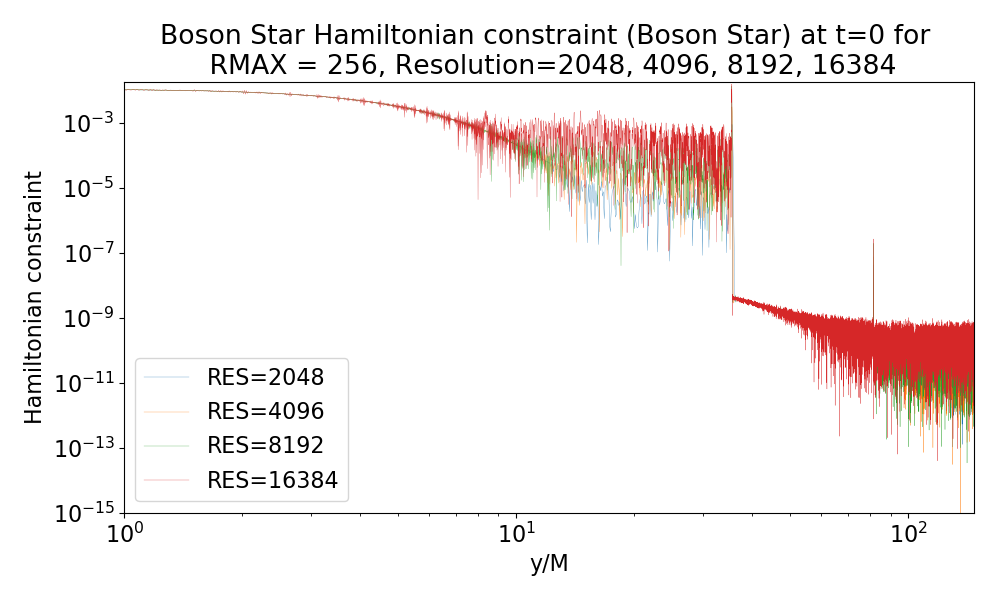

In [38]:
Image("Ham for diff RES (quad, Boson Star).png")

In [52]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.linalg as la
# Globally fix plot styling
import matplotlib as mpl
import scipy.optimize as opt

plt.rcParams.update(plt.rcParamsDefault) 
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16) 
plt.rcParams.update({'font.size': 16}) 
plt.rcParams.update({'font.family' : 'sans-serif'}) 
plt.rcParams.update({'font.sans-serif' : 'Helvetica'}) 
plt.rcParams.update({'figure.figsize' : '10., 6.'}) 
plt.rcParams.update({'figure.autolayout': True})

x,y,sf,cf,ham = np.loadtxt('BSSN_SF-output2D/quad_pot_2d_t-00000000_Boson_256R_2048.txt').T
realx_2048 = []
realcf_2048 = []

for i in range(len(x)):
    if x[i] not in realx_2048:
        realx_2048.append(x[i])
        realcf_2048.append(cf[i])

x,y,sf,cf,ham = np.loadtxt('BSSN_SF-output2D/quad_pot_2d_t-00000000_Boson_256R_4096.txt').T
realx_4096 = []
realcf_4096 = []

for i in range(len(x)):
    if x[i] not in realx_4096:
        realx_4096.append(x[i])
        realcf_4096.append(cf[i])

x,y,sf,cf,ham = np.loadtxt('BSSN_SF-output2D/quad_pot_2d_t-00000000_Boson_256R_8192.txt').T
realx_8192 = []
realcf_8192 = []

for i in range(len(x)):
    if x[i] not in realx_8192:
        realx_8192.append(x[i])
        realcf_8192.append(cf[i])
        
x,y,sf,cf,ham = np.loadtxt('BSSN_SF-output2D/quad_pot_2d_t-00000000_Boson_256R_16384.txt').T
realx_16384 = []
realcf_16384 = []

for i in range(len(x)):
    if x[i] not in realx_16384:
        realx_16384.append(x[i])
        realcf_16384.append(cf[i])
    
fig = plt.figure()
plotdescription = "Scalar field"
plt.title("Boson Star Conformal Factor at t=0 for \n RMAX = 256, Resolution=2048, 4096, 8192, 16384")
plt.xlabel("y/M")
plt.xscale('log')
plt.ylabel("Conformal Factor")
#plt.yscale('log')

plt.plot(realx_2048,realcf_2048,label='RES=2048',linewidth=0.2)
plt.plot(realx_4096,realcf_4096,label='RES=4096',linewidth=0.2)
plt.plot(realx_8192,realcf_8192,label='RES=8192',linewidth=0.2)
plt.plot(realx_16384,realcf_16384,label='RES=16384',linewidth=0.2)
#plt.axhline(y=0.0, color='purple', linestyle='dashed',label='Theory')
plt.legend()

plt.ylim(0.93,1.01)
plt.xlim(0.0,147.0)
plt.savefig("CF for diff RES (quad, Boson Star).png") 
plt.close() 

C:\Users\liyan\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


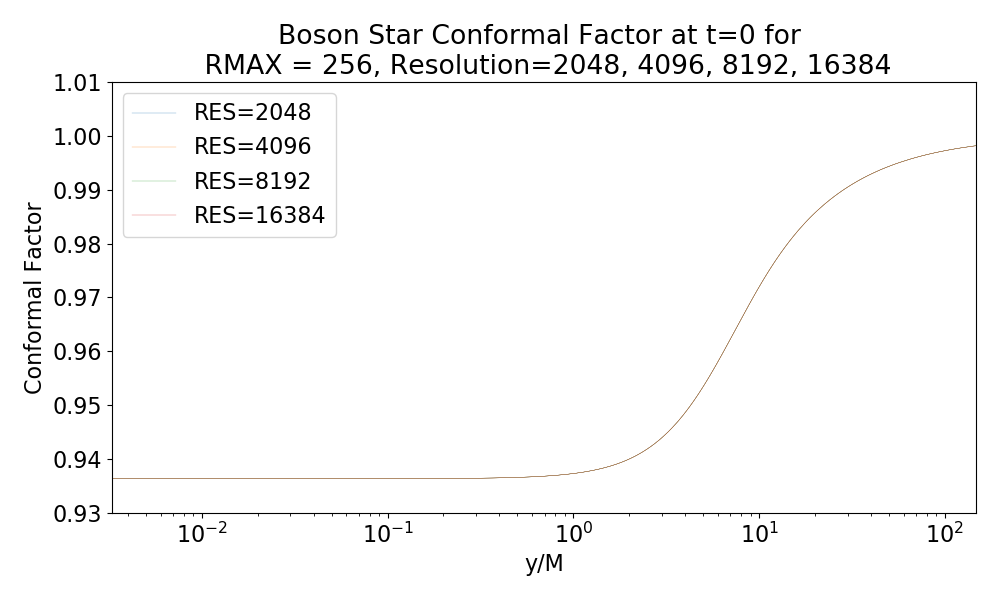

In [53]:
Image("CF for diff RES (quad, Boson Star).png")